In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.style.use('ggplot')

In [3]:
# read in data
cars_file = 'data/cars.data.csv'
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
to_use = ['buying', 'maint', 'safety', 'doors']
cardata = pd.read_csv(cars_file, names=col_names, usecols=to_use, index_col=False)

# convert to categoricals
cardata['buying'] = pd.Categorical(cardata['buying'], ['low', 'med', 'high', 'vhigh'])
cardata['maint'] = pd.Categorical(cardata['maint'], ['low', 'med', 'high', 'vhigh'])
cardata['safety'] = pd.Categorical(cardata['safety'], ['low', 'med', 'high'])
cardata['doors'] = pd.Categorical(cardata['doors'], ['2', '3', '4', '5more'])

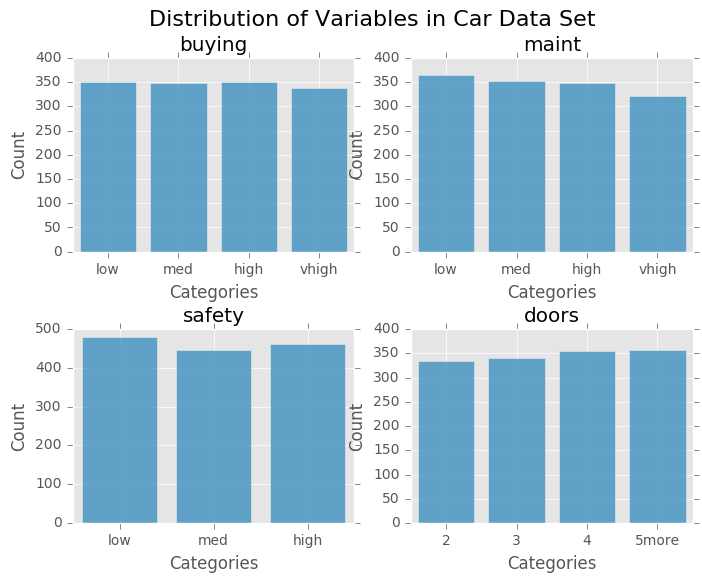

In [4]:
f, axs = plt.subplots(2, 2, figsize=(8, 6))
to_use = np.reshape(to_use, [2, 2])
for rw in range(2):
    for col in range(2):
        var = to_use[rw, col]
        data = cardata[var].value_counts(sort=False)
        axs[rw, col].bar(range(len(data.index)), data.values, align='center', alpha = 0.75)
        axs[rw, col].set_title(var)
        axs[rw, col].set_xticks(range(len(data.index)))
        axs[rw, col].set_xticklabels(data.index)
        axs[rw, col].set_xlabel('Categories')
        axs[rw, col].set_ylabel('Count')
f.subplots_adjust(hspace=0.4)
f.suptitle('Distribution of Variables in Car Data Set', fontsize = 16)
plt.show()

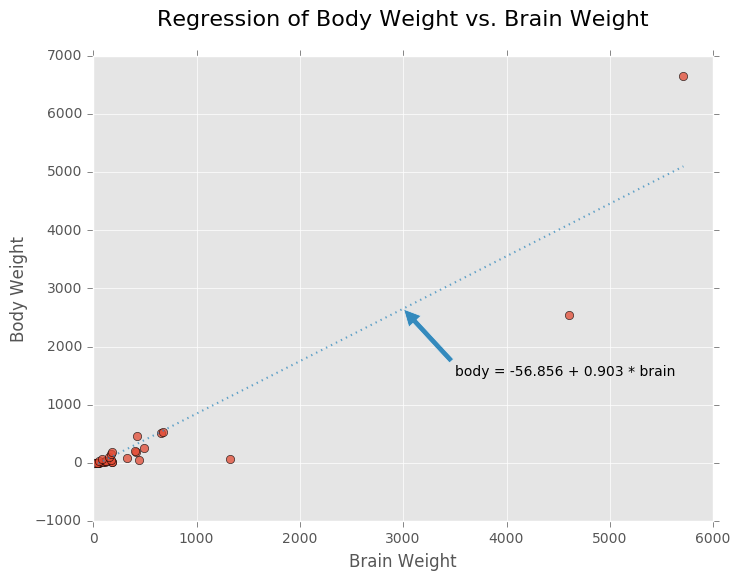

In [5]:
from scipy import stats

# prepare data
brain_body = pd.read_csv('data/brainandbody.csv')
br = brain_body['brain']
bo = brain_body['body']

# perform regression
lin_reg = stats.linregress(br, bo)

# get points for plotting line
x = [br.min(), br.max()]
y = [lin_reg.intercept + lin_reg.slope * item for item in x]

# plot points and line
plt.figure(figsize = (8,6))
plt.title('Regression of Body Weight vs. Brain Weight\n', size=16)
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.plot(br, bo, 'o', alpha = 0.75)
plt.plot(x, y, ':', alpha = 0.75, lw = 1.5)
# annotate equation
plt.annotate('body = %.3f + %.3f * brain' % (lin_reg.intercept, lin_reg.slope),
             xy=(3000, lin_reg.intercept + 3000 * lin_reg.slope),
             xytext=(3500, 1500),
             arrowprops=dict(shrink=0.01)
            )
plt.show()

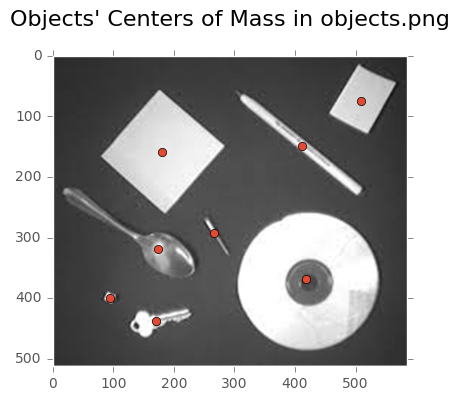

In [6]:
import scipy.misc as misc
import scipy.ndimage as ndimage

# process image
raw_img = misc.imread('data/objects.png')
img = ndimage.gaussian_filter(raw_img, 2)
thres = img > img.mean()
#find objects
distance = ndimage.distance_transform_edt(thres)
found, n_found = ndimage.label(distance)
com = ndimage.measurements.center_of_mass(distance, found, xrange(1, n_found+1))
# store coordinates of objects
x = [item[1] for item in com]
y = [item[0] for item in com]

implot = plt.imshow(raw_img)
plt.plot(x, y, 'o')
plt.title("Objects' Centers of Mass in objects.png\n", size=16)
plt.xlim(0, 585)
plt.ylim(512, 0)
plt.grid(False)
plt.show()

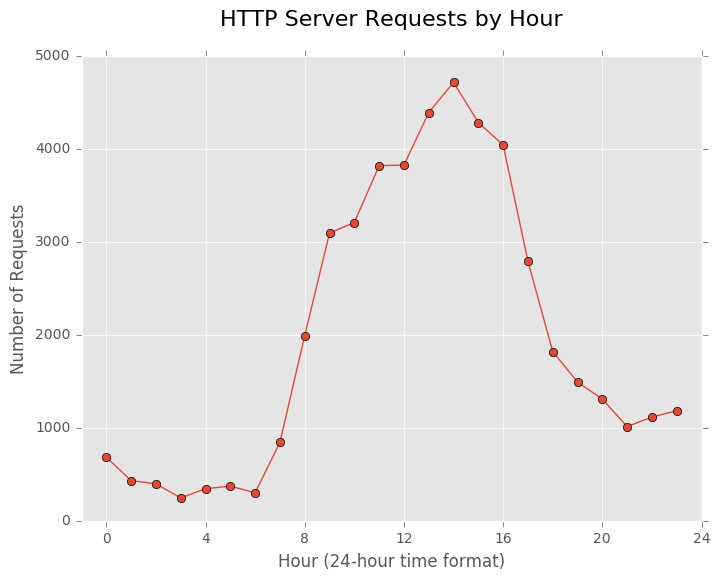

In [7]:
# read in data & peform sanitation
epa_raw = pd.read_table('data/epa-http.txt', header=None, squeeze=True)
epa_raw = epa_raw.str.replace('gifalt=" HTTP/1.0"', 'gifalt= HTTP/1.0"')
epa = pd.DataFrame(epa_raw.str.split(' ', 2).tolist(), columns=['host', 'date', None])[['host', 'date']]
epa['date'] = '1995-08' + epa['date']
epa['date'] = pd.to_datetime(epa['date'], format='%Y-%m[%d:%H:%M:%S]')

# create hour count
epa['hour'] = epa['date'].dt.hour
by_hour = epa.groupby('hour').size()

# create plot
plt.figure(figsize=(8,6))
plt.plot(by_hour.index, by_hour.values, 'o-')
plt.title('HTTP Server Requests by Hour\n', size=16)
plt.xlabel('Hour (24-hour time format)')
plt.ylabel('Number of Requests')
plt.xlim(-1, 24)
plt.xticks(np.arange(0, 25, 4))
plt.show()